In [44]:
!pip install LovelyPlots aquarel

import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt


In [42]:
uciml = pd.read_parquet('../../data/uciml-dataset-hourly.complete.parquet')
refit = pd.read_parquet('../../data/refit-dataset-hourly.complete.parquet')
hue = pd.read_parquet('../../data/hue-dataset-hourly.complete.parquet')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

UCIML: min=0.000 mean=1.078 median=0.782 max=6.561
[0.0, 0.337, 0.782, 1.57, 6.561]
HUE: min=0.000 mean=0.863 median=0.560 max=14.480
[0.0, 0.3, 0.56, 1.12, 14.48]
REFIT: min=0.000 mean=0.529 median=0.329 max=61.822
[0.0, 0.206, 0.329, 0.603, 61.822]


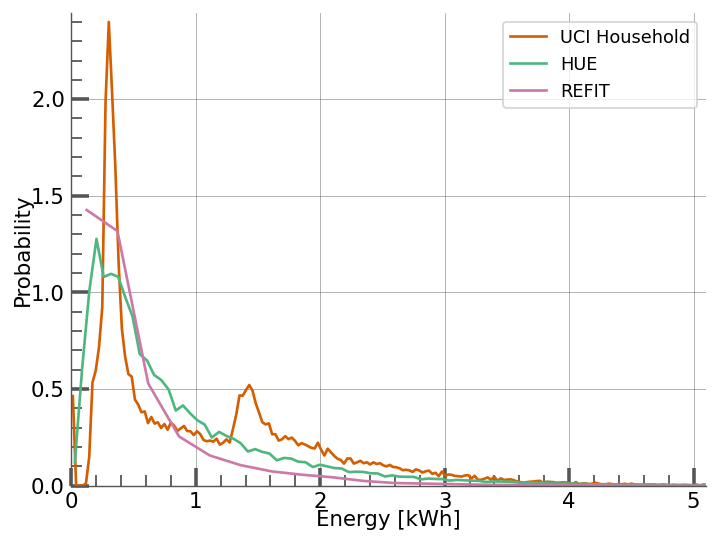

In [54]:
plt.rcdefaults()
#plt.style.use('ipynb')
from aquarel import load_theme
with load_theme("scientific").set_transforms(trim=True):

    plt.figure(dpi=128)

    kwargs = dict(bins=250, density=True, cumulative=False, histtype='step', alpha=0)

    y = uciml.global_active_power
    n, x, _ = plt.hist(y, **kwargs)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers, n, label='UCI Household')
    print(f'UCIML: min={y.min():,.3f} mean={y.mean():,.3f} median={y.median():,.3f} max={y.max():,.3f}')
    print([np.round(y.quantile(i), 3) for i in (0, 0.25, 0.50, 0.75, 1.0)])

    y = hue.energy
    n, x, _ = plt.hist(y, **kwargs)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers, n, label='HUE')
    print(f'HUE: min={y.min():,.3f} mean={y.mean():,.3f} median={y.median():,.3f} max={y.max():,.3f}')
    print([np.round(y.quantile(i), 3) for i in (0, 0.25, 0.50, 0.75, 1.0)])

    y = refit.energy
    n, x, _ = plt.hist(y, **kwargs)
    bin_centers = 0.5 * (x[1:] + x[:-1])
    plt.plot(bin_centers, n, label='REFIT')
    print(f'REFIT: min={y.min():,.3f} mean={y.mean():,.3f} median={y.median():,.3f} max={y.max():,.3f}')
    print([np.round(y.quantile(i), 3) for i in (0, 0.25, 0.50, 0.75, 1.0)])

    plt.xlim(0, 5.1)
    plt.legend()
    plt.xlabel('Energy [kWh]')
    plt.ylabel('Probability [%]')

    plt.show()


